## Deep learning model for brain tumor segmentation using U-Net architecture with transfer learning on medical imaging data.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
DATA_PATH = '../data/mri-segmentation/kaggle_3m/'


patient_folders = sorted(glob(os.path.join(DATA_PATH, 'TCGA*')))

print(f"Total number of patients: {len(patient_folders)}")
print(f"\nFirst 5 patient folders:")
for folder in patient_folders[:5]:
    print(os.path.basename(folder))

Total number of patients: 110

First 5 patient folders:
TCGA_CS_4941_19960909
TCGA_CS_4942_19970222
TCGA_CS_4943_20000902
TCGA_CS_4944_20010208
TCGA_CS_5393_19990606


In [7]:
# Pick the first patient and count their images
sample_patient = patient_folders[0]
image_files = glob(os.path.join(sample_patient, '*[0-9].tif'))  # images (not masks)
mask_files = glob(os.path.join(sample_patient, '*_mask.tif'))   # masks

print(f"Patient: {os.path.basename(sample_patient)}")
print(f"Number of images: {len(image_files)}")
print(f"Number of masks: {len(mask_files)}")

Patient: TCGA_CS_4941_19960909
Number of images: 23
Number of masks: 23


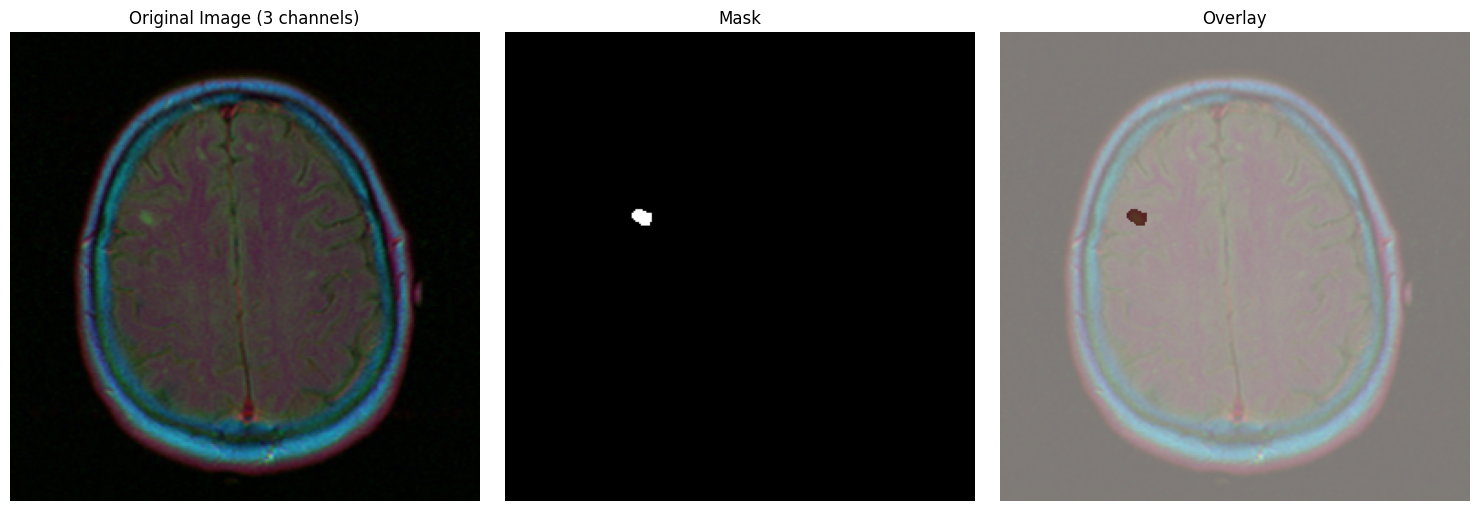

Image shape: (256, 256, 3)
Mask shape: (256, 256)
Unique mask values: [  0 255]


In [15]:
# Load one image and its corresponding mask
sample_image_path = image_files[4]  # pick a middle slice
sample_mask_path = sample_image_path.replace('.tif', '_mask.tif')

# Read image and mask
image = cv2.imread(sample_image_path)
mask = cv2.imread(sample_mask_path, cv2.IMREAD_GRAYSCALE)

# Display
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image (3 channels)')
axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Mask')
axes[1].axis('off')

axes[2].imshow(image)
axes[2].imshow(mask, cmap='Reds', alpha=0.5)  # overlay
axes[2].set_title('Overlay')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Image shape: {image.shape}")
print(f"Mask shape: {mask.shape}")
print(f"Unique mask values: {np.unique(mask)}")

In [16]:
# Count total images and slices with tumors
total_images = 0
tumor_slices = 0

for patient_folder in patient_folders:
    images = glob(os.path.join(patient_folder, '*[0-9].tif'))
    total_images += len(images)
    
    for img_path in images:
        mask_path = img_path.replace('.tif', '_mask.tif')
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if np.sum(mask) > 0:
            tumor_slices += 1

print(f"Total patients: {len(patient_folders)}")
print(f"Total images: {total_images}")
print(f"Slices with tumor: {tumor_slices}")
print(f"Slices without tumor: {total_images - tumor_slices}")
print(f"Percentage with tumor: {tumor_slices/total_images*100:.2f}%")

Total patients: 110
Total images: 3929
Slices with tumor: 1373
Slices without tumor: 2556
Percentage with tumor: 34.95%
